In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

https://www.kaggle.com/jnikhilsai/cross-validation-with-linear-regression

# 1 

A partir del fichero "US_Crime_Rates_1960_2014", se pide:

1. Tratar el dataset como una serie temporal a partir de la columna Year. Siempre el eje X será el nuevo índice Year.
2. Dibujar todas las columnas numéricas.
3. Como se puede ver en el punto 2, la columna "Population" tiene una magnitud diferente a la de las demás columnas: Dibuja la misma gráfica que antes pero con dos resoluciones diferentes para que se puedan observar con mejor detalle todas las columnas. 
4. A partir de ahora y para el resto del ejercicio, borra las columnas "Population" y "Total" ¿Qué columnas tienen mejor correlación? 
5. A partir de las cinco columnas que tengan mejor correlación con la columna "Murder", entrena un modelo de regresión no lineal a partir de polinomio de grado 6. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento.
6. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones=23 y n_repeats=7.

### Me rindo. O no estoy entiendo la pregunta o no se como hacerlo pero estoy intentando sacar un listado de los resultados de CV por iteraciones, y luego poner esos resultados en una grafica para la parte 6.... pues no encuentro la manera de hacerlo. Abajo del todo esta la parte 5 (despues de intentar con 8 maneras diferentes)

Estos errores me estan volviendo loco:

ValueError: x and y must be the same size

ValueError: Pipeline.fit does not accept the n_features_to_select parameter. You can pass parameters to specific steps of your pipeline using the stepname__parameter format, e.g. `Pipeline.fit(X, y, logisticregression__sample_weight=sample_weight)`.

ValueError: n_splits=5 cannot be greater than the number of members in each class.


<AxesSubplot:xlabel='Year'>

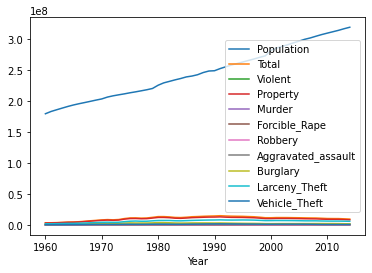

In [3]:
import pandas as pd
df = pd.read_csv("../data/US_Crime_Rates_1960_2014.csv")

df.set_index("Year", inplace=True)
df.plot()



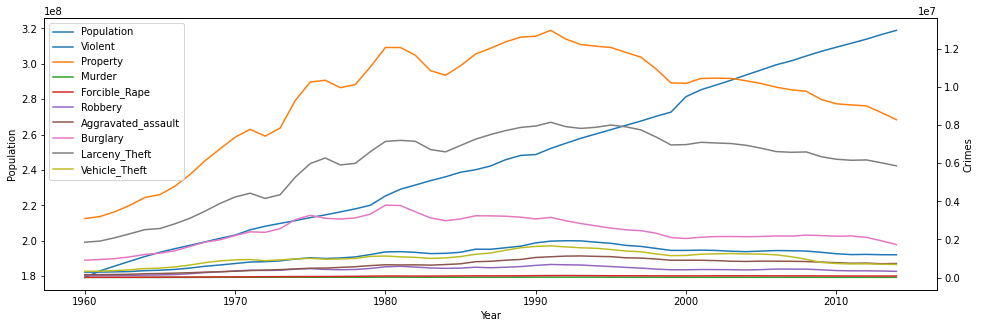

In [34]:
a = df[["Violent", "Property", "Murder", "Forcible_Rape", "Robbery", "Aggravated_assault", "Burglary", "Larceny_Theft", "Vehicle_Theft"]]

fig,ax = plt.subplots(figsize = (16, 5))
ax.plot(df.index, df.Population, label="Population")
ax2=ax.twinx()
ax2.plot(df.index, a, label=["Violent", "Property", "Murder", "Forcible_Rape", "Robbery", "Aggravated_assault", "Burglary", "Larceny_Theft", "Vehicle_Theft"])
ax.set_ylabel("Population")
ax2.set_ylabel("Crimes")
ax.set_xlabel("Year")

lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax2.legend(lines, labels)

In [42]:
df.drop(columns = "Total", inplace=True)
df

,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,
1960,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800
1965,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900
1966,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200
1967,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800
1968,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600


In [58]:
correlation = df.corr(method='pearson')
columns = correlation.nlargest(5, 'Murder').index
columns

Index(['Murder', 'Robbery', 'Burglary', 'Property', 'Vehicle_Theft'], dtype='object')

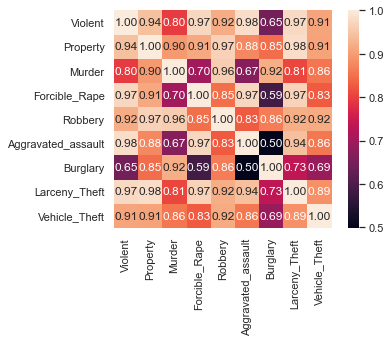

In [54]:
correlation_map = np.corrcoef(df.values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

<AxesSubplot:>

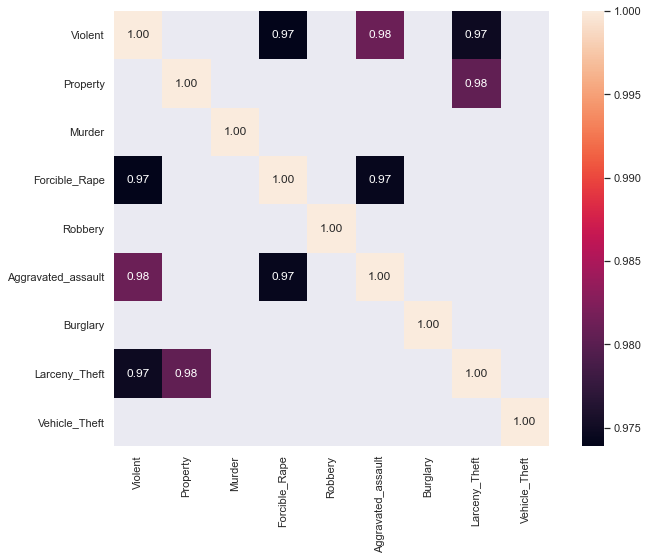

In [57]:
corr = df.corr()

kot = corr[corr>=0.97]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cbar=True, annot=True, square=True, fmt='.2f')

In [4]:
correlation = df.corr(method='pearson')
columns = correlation.nlargest(6, 'Murder').index
columns

Index(['Murder', 'Robbery', 'Burglary', 'Property', 'Total', 'Vehicle_Theft'], dtype='object')

<AxesSubplot:>

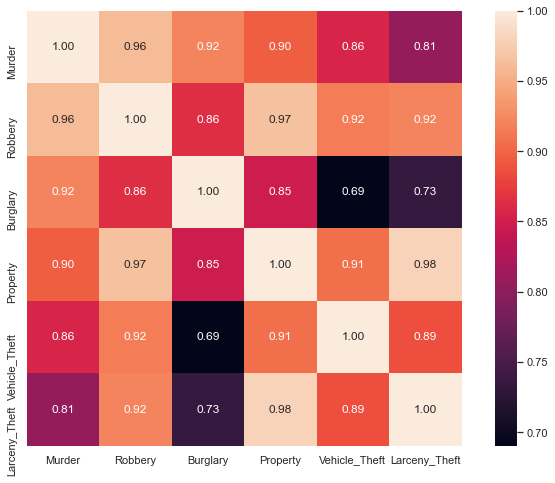

In [117]:
corr = df.corr()

correlation_map = np.corrcoef(df[columns].values.T)
plt.figure(figsize=(12,8))
sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

In [6]:
df1 = df[['Murder', 'Robbery', 'Burglary', 'Property', 'Vehicle_Theft', 'Larceny_Theft']]

In [5]:
X = df[columns].values
y = df['Murder'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

NameError: name 'train_test_split' is not defined

In [79]:
scores = []
print("################")
polinominal_model = PolynomialFeatures(6) 
X_poly = polinominal_model.fit_transform(X_train,y_train)
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_poly, y_train)
y_pred = lin_reg_model.predict(X_poly)
print("y_pred", y_pred.shape)
print("Score:", r2_score(y_train, y_pred))
print("MAE:", mean_absolute_error(y_true=y_train, y_pred=y_pred))

################
y_pred (44,)
Score: 1.0
MAE: 4.685833284218626e-07


In [94]:
X

array([[    9110,   107840,   912100,  3095700,   328200],
       [    8740,   106670,   949600,  3198600,   336000],
       [    8530,   110860,   994300,  3450700,   366800],
       [    8640,   116470,  1086400,  3792500,   408300],
       [    9360,   130390,  1213200,  4200400,   472800],
       [    9960,   138690,  1282500,  4352000,   496900],
       [   11040,   157990,  1410100,  4793300,   561200],
       [   12240,   202910,  1632100,  5403500,   659800],
       [   13800,   262840,  1858900,  6125200,   783600],
       [   14760,   298850,  1981900,  6749000,   878500],
       [   16000,   349860,  2205000,  7359200,   928400],
       [   17780,   387700,  2399300,  7771700,   948200],
       [   18670,   376290,  2375500,  7413900,   887200],
       [   19640,   384220,  2565500,  7842200,   928800],
       [   20710,   442400,  3039200,  9278700,   977100],
       [   20510,   470500,  3265300, 10252700,  1009600],
       [   18780,   427810,  3108700, 10345500,   966000

In [95]:
y

array([ 9110,  8740,  8530,  8640,  9360,  9960, 11040, 12240, 13800,
       14760, 16000, 17780, 18670, 19640, 20710, 20510, 18780, 19120,
       19560, 21460, 23040, 22520, 21010, 19310, 18690, 18980, 20613,
       20096, 20680, 21500, 23440, 24700, 23760, 24530, 23330, 21610,
       19650, 18208, 16914, 15522, 15586, 16037, 16229, 16528, 16148,
       16740, 17030, 16929, 16442, 15399, 14772, 14661, 14866, 14319,
       14249], dtype=int64)

In [103]:
def create_polynomial_regression_model(degree):
 poly_features = PolynomialFeatures(degree=degree)
 X_poly = poly_features.fit_transform(X)
 poly = LinearRegression()
 return np.mean(cross_val_score(poly, X_poly, y, cv=5))


[-17009.56913238716]


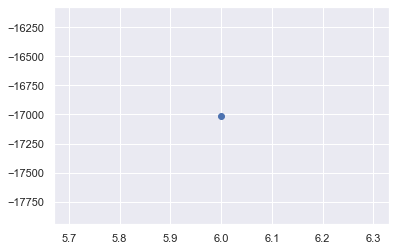

In [110]:
poly_cv = []
#for i in range(6):
poly_cv.append(create_polynomial_regression_model(6))
print(poly_cv)
plt.scatter(6,poly_cv)

In [137]:
y

array([ 9110,  8740,  8530,  8640,  9360,  9960, 11040, 12240, 13800,
       14760, 16000, 17780, 18670, 19640, 20710, 20510, 18780, 19120,
       19560, 21460, 23040, 22520, 21010, 19310, 18690, 18980, 20613,
       20096, 20680, 21500, 23440, 24700, 23760, 24530, 23330, 21610,
       19650, 18208, 16914, 15522, 15586, 16037, 16229, 16528, 16148,
       16740, 17030, 16929, 16442, 15399, 14772, 14661, 14866, 14319,
       14249], dtype=int64)

In [172]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 6))}]


# step-3: perform grid search
# 3.1 specify model

model = Pipeline([('poly', PolynomialFeatures(degree=6)),
                  ('linear', LinearRegression())])     
rfe = model.fit(X, y, n_features_to_select=1)

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe,
                        param_grid = hyper_params,  
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

ValueError: Pipeline.fit does not accept the n_features_to_select parameter. You can pass parameters to specific steps of your pipeline using the stepname__parameter format, e.g. `Pipeline.fit(X, y, logisticregression__sample_weight=sample_weight)`.

In [144]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005094,0.000641,0.000,0.000000e+00,1,{'n_features_to_select': 1},NaN,NaN,NaN,NaN,...,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.004659,0.000347,0.000,0.000000e+00,2,{'n_features_to_select': 2},NaN,NaN,NaN,NaN,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.004885,0.000772,0.000,0.000000e+00,3,{'n_features_to_select': 3},NaN,NaN,NaN,NaN,...,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.004401,0.000495,0.000,0.000000e+00,4,{'n_features_to_select': 4},NaN,NaN,NaN,NaN,...,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.004588,0.000221,0.001,1.168008e-07,5,{'n_features_to_select': 5},-0.642336,-2389.069254,-13.516867,-286.654936,...,-602.041734,903.365165,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [174]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedKFold

In [9]:
model = Pipeline([('poly', PolynomialFeatures(degree=6)),
                  ('linear', LinearRegression())])  

In [193]:
param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X,y , param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

ValueError: n_splits=5 cannot be greater than the number of members in each class.

In [179]:
rkf = RepeatedKFold(n_splits=2, n_repeats=1, random_state=1)
for train_index, test_index in rkf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 0  1  4  5  6  7  8  9 11 12 14 15 16 18 20 23 25 28 29 33 37 38 39 43
 49 52 54] TEST: [ 2  3 10 13 17 19 21 22 24 26 27 30 31 32 34 35 36 40 41 42 44 45 46 47
 48 50 51 53]
TRAIN: [ 2  3 10 13 17 19 21 22 24 26 27 30 31 32 34 35 36 40 41 42 44 45 46 47
 48 50 51 53] TEST: [ 0  1  4  5  6  7  8  9 11 12 14 15 16 18 20 23 25 28 29 33 37 38 39 43
 49 52 54]


In [208]:
degree = 6

# Paso nº 1 - Llamamos a fit_transform 
# Calculamos las pendientes de nuestras Xn
polinominal_model = PolynomialFeatures(degree) 
X_poly = polinominal_model.fit_transform(X_train, y_train)

#######
print(X_poly)
print(X_poly.shape)

# Paso nº2
# Llamar a la regresión lineal entrenándola con la salida del fit_transform
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_poly, y_train)
y_pred = lin_reg_model.predict(X_poly)

print("y_pred", y_pred.shape)
print("Score:", r2_score(y_train, y_pred))



[[1.00000000e+00 8.53000000e+03 1.10860000e+05 ... 2.15541904e+35
  2.29115167e+34 2.43543174e+33]
 [1.00000000e+00 8.64000000e+03 1.16470000e+05 ... 3.99731799e+35
  4.30350676e+34 4.63314913e+33]
 [1.00000000e+00 1.60000000e+04 3.49860000e+05 ... 4.02347900e+37
  5.07582061e+36 6.40340234e+35]
 ...
 [1.00000000e+00 1.47720000e+04 3.69089000e+05 ... 2.48423340e+37
  2.01616118e+36 1.63628180e+35]
 [1.00000000e+00 1.46610000e+04 3.54772000e+05 ... 2.15995428e+37
  1.70956418e+36 1.35308869e+35]
 [1.00000000e+00 1.43190000e+04 3.45095000e+05 ... 1.79982487e+37
  1.45698923e+36 1.17945787e+35]]
(28, 462)
y_pred (28,)
Score: 1.0


TRAIN: [ 0  1  2  4  5  8 13 14 15 16 17 20 21 23 24 25 26 27 29 31 32 33 35 36
 37 38 43 45 46 48 49 50 51 52 53 54] VAL: [ 3  6  7  9 10 11 12 18 19 22 28 30 34 39 40 41 42 44 47]
score_val: -2120.9823304026854
y_val: [ 8640 11040 12240 14760 16000 17780 18670 19560 21460 21010 20680 23440
 23330 15522 15586 16037 16229 16148 16929]
------------
TRAIN: [ 1  3  4  5  6  7  9 10 11 12 15 16 17 18 19 22 24 26 27 28 30 31 32 33
 34 37 38 39 40 41 42 43 44 45 46 47 51] VAL: [ 0  2  8 13 14 20 21 23 25 29 35 36 48 49 50 52 53 54]
score_val: -1527.1619864244253
y_val: [ 9110  8530 13800 19640 20710 23040 22520 19310 18980 21500 21610 19650
 16442 15399 14772 14866 14319 14249]
------------
TRAIN: [ 0  2  3  6  7  8  9 10 11 12 13 14 18 19 20 21 22 23 25 28 29 30 34 35
 36 39 40 41 42 44 47 48 49 50 52 53 54] VAL: [ 1  4  5 15 16 17 24 26 27 31 32 33 37 38 43 45 46 51]
score_val: -54537.806150162
y_val: [ 8740  9360  9960 20510 18780 19120 18690 20613 20096 24700 23760 24530
 18208 16914 165

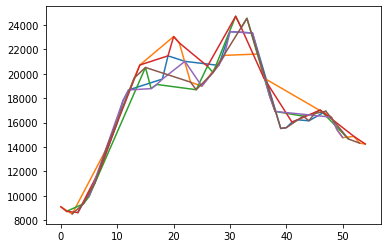

In [19]:
import numpy as np

from sklearn.model_selection import RepeatedKFold


model = Pipeline([('poly', PolynomialFeatures(degree=6)),
                  ('linear', LinearRegression())])  

poly = model
rskf = RepeatedKFold(n_splits=3, n_repeats=2,random_state=36851234)

for train_index, val_index in rskf.split(X, y):
    print("TRAIN:", train_index, "VAL:", val_index)
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    poly.fit(X_train, y_train)
    score_val = poly.score(X_val, y_val)
    print("score_val:", score_val)
    print("y_val:", y_val)
    print("------------")
    plt.plot(val_index, score_val)

In [39]:
import numpy as np

from sklearn.model_selection import RepeatedKFold


model = Pipeline([('poly', PolynomialFeatures(degree=6)),
                  ('linear', LinearRegression())])  

poly = model
rskf = RepeatedKFold(n_splits=3, n_repeats=7,random_state=0)

for train_index, val_index in rskf.split(X, y):
    print("TRAIN:", train_index, "VAL:", val_index)
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    poly.fit(X_train, y_train)
    score_val = poly.score(X_val, y_val)
    print("score_val:", score_val)
    print("y_val:", y_val)
    print("------------")
    plt.plot(val_index, score_val)

TRAIN: [ 0  1  3  5  6  8  9 12 13 15 16 17 18 19 20 21 23 24 25 27 29 34 35 36
 38 39 41 42 44 47 48 50 51 52 53 54] VAL: [ 2  4  7 10 11 14 22 26 28 30 31 32 33 37 40 43 45 46 49]
score_val: -481504.2312875527
y_val: [ 8530  9360 12240 16000 17780 20710 21010 20613 20680 23440 24700 23760
 24530 18208 15586 16528 16740 17030 15399]
------------


ValueError: x and y must have same first dimension, but have shapes (19,) and (1,)